# Testing

In [3]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy as sc
from matplotlib.colors import LogNorm
%matplotlib notebook
plt.close('All')

# Input

# Polyfit vs expfit

[0.66926169 1.36832665]
[0.87997217 0.60220684]
[0.84622271 0.75633348]


<IPython.core.display.Javascript object>


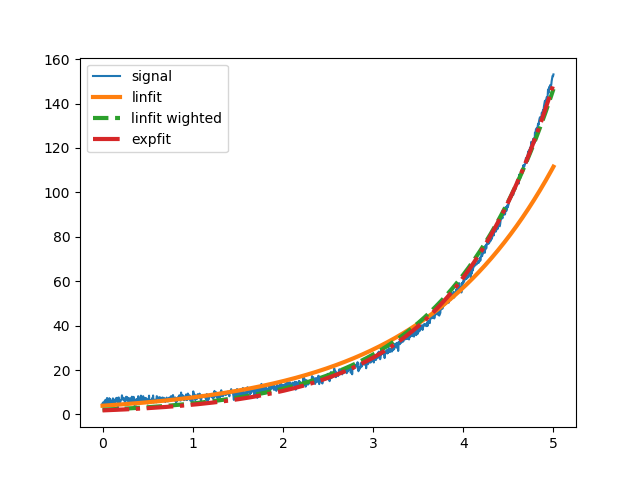

In [24]:
N = 1000
x=  np.linspace(0,5,N)
y = 5+np.exp(x) + np.random.randn(N)*1


def exp(x,a,b):
    return np.exp(a*x+b)

linfit =np.polyfit(x,np.log(y),1)
linwfit=np.polyfit(x,np.log(y),1,w=y)
expfit=sc.optimize.curve_fit(exp,x,y)
print(linfit)
print(expfit[0])
print(linwfit)

plt.figure()
plt.plot(x,y,label='signal')
# plt.plot(x,np.log(y),label='logsignal')
plt.plot(x,np.exp(x*linfit[0]+linfit[1]),lw=3,label='linfit')
plt.plot(x,np.exp(x*linwfit[0]+linwfit[1]),'--',lw=3,label='linfit wighted')
plt.plot(x,exp(x,expfit[0][0],expfit[0][1]),'-.',lw=3,label='expfit')
plt.legend(loc=0)

In [32]:
NPs = [1e3,1e4,1e5]

mean = np.zeros((3,10))
for i in range(3):
    for j in range(10):
        mean[i,j] = np.mean(np.random.randn(int(NPs[i])))

print(np.std(mean,axis=1))
print(1/np.sqrt(NPs))

[0.01932304 0.01063787 0.00350182]
[0.03162278 0.01       0.00316228]


# Numpy

In [279]:
N =4
n =3
a= np.arange(n*N).reshape((N,n))
b = np.linspace(1,n,n)

np.divide(a,b)


array([[0.        , 0.5       , 0.66666667],
       [3.        , 2.        , 1.66666667],
       [6.        , 3.5       , 2.66666667],
       [9.        , 5.        , 3.66666667]])

In [314]:
Y = np.arange(24).reshape(4,6)
y = np.arange(5)/5
x = np.arange(7)*2
dx = np.diff(x)
print(Y)
print(dx)
print(Y*dx)
print(np.trapz(Y,axis=0))
print(np.trapz(Y,axis=1))
print(np.sum(Y,axis=0))
print(np.sum(Y,axis=1))

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[2 2 2 2 2 2]
[[ 0  2  4  6  8 10]
 [12 14 16 18 20 22]
 [24 26 28 30 32 34]
 [36 38 40 42 44 46]]
[27. 30. 33. 36. 39. 42.]
[ 12.5  42.5  72.5 102.5]
[36 40 44 48 52 56]
[ 15  51  87 123]


In [280]:
x1 = np.arange(12.0).reshape((4, 3))
x2 = np.arange(3.0)
np.divide(x1, x2)


/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ nan,  1. ,  1. ],
       [ inf,  4. ,  2.5],
       [ inf,  7. ,  4. ],
       [ inf, 10. ,  5.5]])

In [286]:
x = np.array([[1,2],[3,4]])
print(x)
print(x[0])
print(x.reshape(4,))

xx = np.arange(5)
yy = np.arange(2)
X,Y = np.meshgrid(xx,yy)
# print(X.reshape(10,))
# print(Y.reshape(10,))
print(X.shape)
print(Y)
print(np.diff(X,axis=1))

[[1 2]
 [3 4]]
[1 2]
[1 2 3 4]
(2, 5)
[[0 0 0 0 0]
 [1 1 1 1 1]]
[[1 1 1 1]
 [1 1 1 1]]


In [ ]:
x = np.linspace(0,5,10)
def integrand()
sc.integrate.quad(

In [335]:
x= np.arange(10)
y = [1,1/x][x>4]
print(y)

/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


TypeError: only integer scalar arrays can be converted to a scalar index

In [53]:
x = np.arange(4)
y = x[:,np.newaxis]

print(x,'\n',y)
print(y[:,0])

[0 1 2 3] 
 [[0]
 [1]
 [2]
 [3]]
[0 1 2 3]


In [209]:
x= np.arange(12).reshape(3,4)
xf=x.flatten()
x.flatten()
xc = xf[:,np.newaxis]
print(x,xf,xc[2:4])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] [ 0  1  2  3  4  5  6  7  8  9 10 11] [[2]
 [3]]


## Multiprocessing

In [371]:
import multiprocessing as mp


In [419]:


N = 20   

#Paralellisation preperation
nProcs = min(N,mp.cpu_count()-1)
print("%d processes"%nProcs)
pool = mp.Pool(processes = nProcs)
procs = []
results = []
    

def collect_result(res):
    results.append(res)

def worker(args):
    [rank] = args
    x = rank**2
    return [x]

 
    
for i in range(N):
    # Parallellisation
    args = [i]
    p = pool.apply_async(worker, args = (args,),callback = collect_result)
    procs.append(p)
    
###################
# Join forces again
pool.close()    
pool.join()


print(len(results))

for j in range(N):
    print(j,results[j])
    
    
    
    
    
def worker2(rank):
    x=rank**2
    y= np.zeros(3)
    y[0]=x
    return y
N = 20
nProcs = min(N,mp.cpu_count()-1)
pool = mp.Pool(processes = nProcs)

args = [1,2]
X = pool.map(worker2,args)
print(X)
# pool.close()
#     i,res,res2 = results[j]

# pool = mp.Pool(processes=4)
res12 = pool.map(worker2, range(4))
print(np.array(res12))

pool.close()
pool.join()
# def parallelize(worker,output,Ntasks):
    

#     #Paralellisation preperation
#     nProcs = min(np.size(Ntasks),mp.cpu_count()-1)
#     pool = mp.Pool(processes = nProcs)
#     procs  = []
#     results= []


#     def collect_result(res):
#         results.append(res)

7 processes
20
0 [0]
1 [1]
2 [4]
3 [9]
4 [36]
5 [16]
6 [49]
7 [100]
8 [81]
9 [25]
10 [196]
11 [144]
12 [169]
13 [225]
14 [256]
15 [121]
16 [324]
17 [289]
18 [361]
19 [64]
[array([1., 0., 0.]), array([4., 0., 0.])]
[[0. 0. 0.]
 [1. 0. 0.]
 [4. 0. 0.]
 [9. 0. 0.]]


## exponential distribution

0.8667793623620699
0.9994469156298522


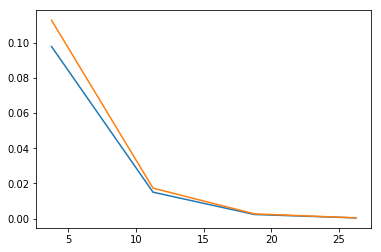

In [334]:
N=5
x= np.linspace(0,30,N)
xc = (x[1:]+x[:-1])/2
sig=2
psi0 = 1/sig**2*np.exp(-xc/sig**2)
psi1 = (np.exp(-x[:-1]/sig**2)-np.exp(-x[1:]/sig**2))/np.diff(x)
plt.figure()
plt.plot(xc,psi0)
plt.plot(xc,psi1)
print(np.sum(psi0*np.diff(x)))
print(np.sum(psi1*np.diff(x)))

# Test chi2 distribution

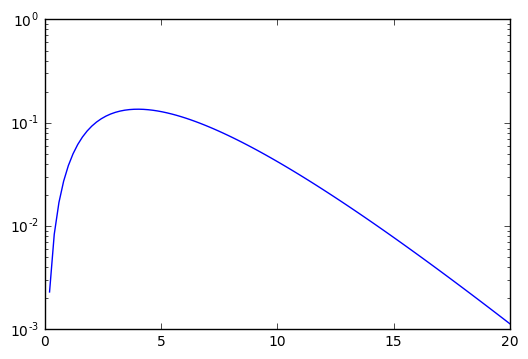

In [70]:
x= np.linspace(0,20,100)
xi2 = st.chi2.pdf(x,6)

plt.figure()
plt.semilogy(x,xi2)


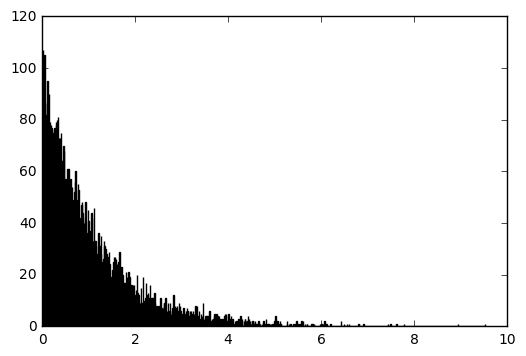

In [71]:
N = int(1e4)
y = np.random.randn(N)
x = np.random.randn(N)
j = 0.5*(x**2 + y**2)

plt.figure()
plt.hist(j,bins=1000);

In [73]:
a  = np.arange(10)
aa = []

for i in range(5):
    aa += [a+i]
    
aa = np.array(aa)
print(np.shape(aa))
dj = np.polyfit(np.arange(5),aa,1)[0]

(5, 10)


In [74]:
dj

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [97]:
D = 1
sig = D/np.sqrt(3)
var = D**3/3*2 /D
print(var)
sig = D/np.sqrt(3)
print(sig)

0.6666666666666666
0.57735026919


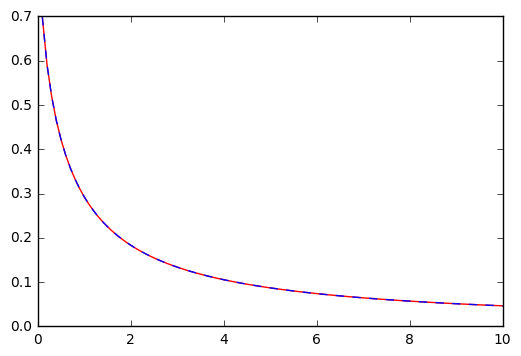

In [101]:
x = np.linspace(0.1,10,100)
f1 = 1/(1+x+np.sqrt(x*(1+x)))
f2 = 1-1/(np.sqrt(1+1/x))
plt.figure()
plt.plot(x,f1,'r')
plt.plot(x,f2,'b--')

# 2D histogram

In [232]:
N = int(4e6)
a = (np.random.randn(N))**2
b = np.random.randn(N)+0.1*a**2
nbin = 50
xedge = np.linspace(0,np.max(a),nbin+1)
ns,xs = np.histogram(a,bins=xedge)

def centerit(x):
    return x[1:]-np.diff(x[:2])[0]*0.5

In [237]:
%%timeit -n 10

H,xedges,yedges = np.histogram2d(a,b,nbin,range=[[0,np.max(a)],[-np.max(b),np.max(b)]],normed=False);
H = H.transpose()
X,Y = np.meshgrid(xedges, yedges);
ind = np.sum(H,axis=0)>0
avg = np.average(Y[1:,1:][:,ind],weights=H[:,ind],axis =0)-np.diff(yedges)[0]*0.5


10 loops, best of 3: 457 ms per loop


In [238]:
%%timeit -n 10

xc = centerit(xedge)
avg2 = np.zeros_like(xc)
ns = np.zeros_like(xc)
for i,a1 in enumerate(xedge[:-1]):
    a2 = xedge[i+1]
    ind2 = np.logical_and(a>=a1,a<a2)
#     if np.any(ind2):
    avg2[i] = np.mean(b[ind2])
#     else:
    ns[i] = np.sum(ind2)
#         avg2[i] =np.nan

# print(xc.shape,ns.shape)
# print(avg2)
# avg2 = avg2[ns>0]
# xc = xc[ns>0]

/home/sfuruset/miniconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/sfuruset/miniconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


10 loops, best of 3: 948 ms per loop


In [240]:
%%timeit -n 10
ys,xs = np.histogram(a,bins=xedge,weights=b)
# ns,xs = np.histogram(a,bins=xedge)
xs = centerit(xs)
# ys[ns==0]=np.nan
ys=ys[ns>0]/ns[[ns>0]]
xs = xs[ns>0]

# print(xs.shape,ys.shape)
# print(ns)

10 loops, best of 3: 372 ms per loop


(-1, 40)

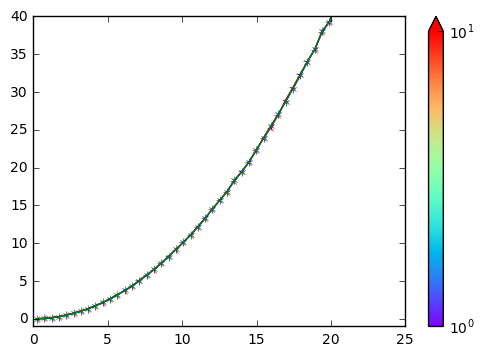

In [236]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
# pcm=plt.pcolor(X,Y,H,norm =LogNorm(vmin=1,vmax=10),cmap='rainbow');
plt.colorbar(pcm, ax=ax1, extend='max')
xcenter = xedges[1:]-np.diff(xedges)[0]*0.5
ycenter = yedges[1:]-np.diff(yedges)[0]*0.5

plt.plot(xcenter[ind],avg,'r-3')
plt.plot(xc,avg2,'b-1')
plt.plot(xs,ys,'g-2')
plt.ylim(-1,40)

In [203]:
print(xs,xc)

[  2.4265368   7.2796104  12.132684   16.9857576  21.8388312] [  2.4265368   7.2796104  12.132684   16.9857576  21.8388312]


In [7]:
0.25e-9*3e8

0.07500000000000001

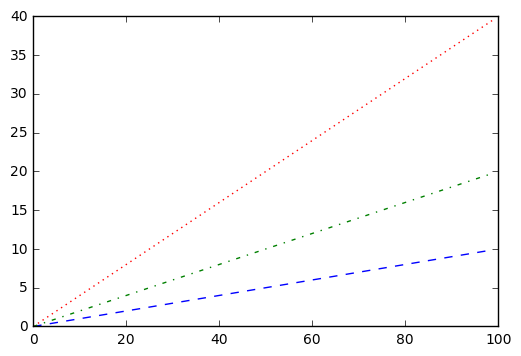

In [10]:
x= np.arange(100)
plt.figure()
plt.plot(x,0.1*x,'--')
plt.plot(x,0.2*x,'-.')
plt.plot(x,0.4*x,':')

/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in true_divide


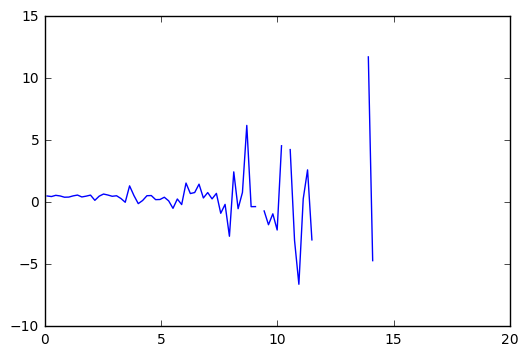

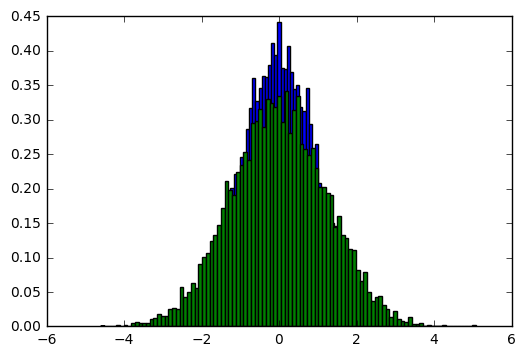

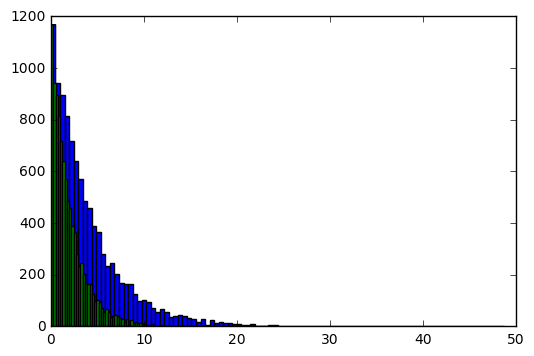

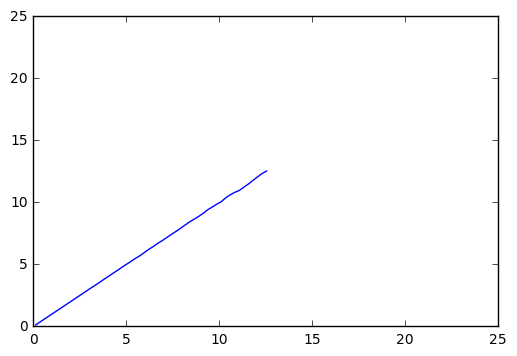

In [52]:
def centerit(edges):
    return edges[1:]-(edges[1]-edges[0])*0.5

N=np.int(1e4)
a0 =np.random.normal(0,1,N)
a=a0.copy()
for i in range(10000):
#     a += np.random.normal(0,0.01,N)
    a+= 0.01*np.cos(np.random.uniform(0,2*np.pi,N))
j0 = a0**2
j = a**2
da = a-a0
dj = j-j0

plt.figure()
ns,xs = np.histogram(j0,bins=100)
dbs,_ = np.histogram(j0,bins=100,weights=dj)
dbs = dbs/ns
plt.plot(centerit(xs),dbs)


plt.figure()
plt.hist(a0,bins=100,normed=True)
plt.hist(a,bins=100,normed=True)
# b =np.random.normal(0,2,N)
# b=a*2


#################
a= np.random.chisquare(2,N)
b= np.random.chisquare(2,N)*2
b=a*2
dba=b-a

plt.figure()
plt.hist(b,bins=100)
plt.hist(a,bins=100)

plt.figure()
ns,xs = np.histogram(a,bins=100)
dbs,_ = np.histogram(a,bins=100,weights=dba)
dbs = dbs/ns
plt.plot(centerit(xs),dbs)

# Save txt files

In [7]:
x = np.linspace(0,1,10)
np.savetxt('test.txt',[x,2*x])
a,b = np.loadtxt('test.txt')
print(a,b)

[ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ] [ 0.          0.22222222  0.44444444  0.66666667  0.88888889  1.11111111
  1.33333333  1.55555556  1.77777778  2.        ]


In [20]:
x = np.array([])
x = np.concatenate((x,np.arange(2)),axis=0)
x = np.concatenate((x,np.arange(2)),axis=0)
x = np.unique(x)
x

array([ 0.,  1.])

# Lists etc

In [31]:
a = {'a':1, 'b':2}
a['b']


2

In [32]:
a.update({4:4})

In [33]:
a[4]

4

In [260]:
np.linspace(0,1,1)

array([0.])

In [29]:
son = 'sondre'
NAMES = [son+'1',son+'2',son+'3','michael']
for i,name in enumerate(NAMES):
    if name[:4] == NAMES[i-1][:4]:
        print(i,'yes')
NAMES[1]    

1 yes
2 yes


'sondre2'

In [21]:
a = [np.arange(1),np.arange(1)]
print(a,a[0])
a[0]=[1,2]
print(a)

[array([0]), array([0])] [0]
[[1, 2], array([0])]


In [27]:
a = np.array([1,1,1,1,2,2,2,2,3])
np.where(a==2)[0][0]

4

# Impedance

(0, 1)

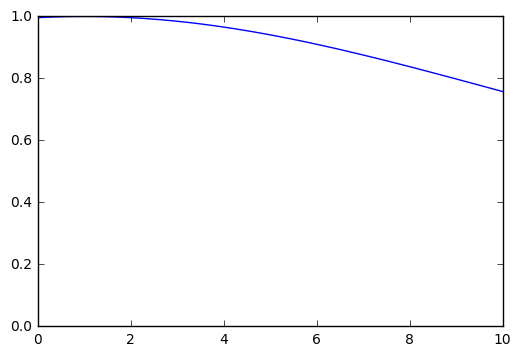

In [6]:
# Reduced gain
g =0.02
g2 = g/2

pi2 = 2*np.pi
a=1e-4
J = np.linspace(0,10,100)
dmu = a*pi2*(J-1)
plt.plot(J,1/(1+(dmu/g2)**2))
plt.ylim(0,1)

# Error bar in polyfit

In [38]:
yerr = np.random.randn(N)

[ -5.28303308e-03   5.28303293e+06] 
 [[ -6.36105439e-05   6.36105455e+04]
 [  6.36105455e+04  -6.36105470e+13]]


/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in sqrt


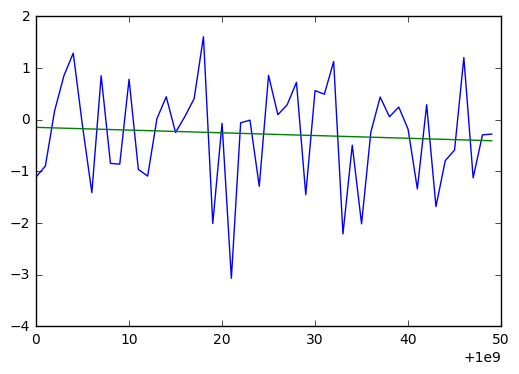

In [53]:
N = 50
x = np.arange(N)+1e9
y1 = x*0 + yerr
y2 = x*0.5+np.random.randn(N)*2

popt,pcov = np.polyfit(x,y1,deg=1,full=False,cov=True)
print(popt,'\n',pcov)

plt.figure()
plt.plot(x,y1)
plt.plot(x,popt[0]*x+popt[1])
plt.plot(x,popt[0]*x+popt[1]+np.sqrt(pcov[0,0])*x,'r:')
# plt.plot(x,popt[0]*x+popt[1]-np.sqrt(pcov[1,1]),'r:')

# x= np.arange(10)


In [232]:
x= np.arange(10)
x[1:]
obj = [slice(0,None,1),slice(0,None,1)]

print(x[slice(0,None,1)])
print(x[slice(None,None,1)])
print(x[slice(0,-1)])
print(x[slice(0,None,1)])

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5 6 7 8 9]


In [52]:
x = np.arange(5)/4
y = np.arange(3)/2 +2
print(x,y)
X,Y = np.meshgrid(x,y)
xx = X.flatten()
yy = Y.flatten()
index = np.ones(15).astype(int)
index[0::5]=0
xxE = (np.delete(X,(0),axis=1)).flatten()
xxW = (np.delete(X,(-1),axis=1)).flatten()
xxE2 = X[:,1:].flatten()
print(X[obj])
print(Y[1:,:])
print(xxE)
print(xxE2)
print(xxW)

[0.   0.25 0.5  0.75 1.  ] [2.  2.5 3. ]
[[0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]]
[[2.5 2.5 2.5 2.5 2.5]
 [3.  3.  3.  3.  3. ]]
[0.25 0.5  0.75 1.   0.25 0.5  0.75 1.   0.25 0.5  0.75 1.  ]
[0.25 0.5  0.75 1.   0.25 0.5  0.75 1.   0.25 0.5  0.75 1.  ]
[0.   0.25 0.5  0.75 0.   0.25 0.5  0.75 0.   0.25 0.5  0.75]


In [262]:
X,Y = np.meshgrid(x,0)
print(X)
print(Y)
print(X[0])

[[0. 1. 1. 0. 1. 1. 0. 1. 1.]]
[[0 0 0 0 0 0 0 0 0]]
[0. 1. 1. 0. 1. 1. 0. 1. 1.]


In [238]:
c = np.arange(4)[:,np.newaxis]
r = np.arange(4)
print(c*r,c+r)
print(c,c[:,0])
print(c.T)
print(c.T)

[[0 0 0 0]
 [0 1 2 3]
 [0 2 4 6]
 [0 3 6 9]] [[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]
[[0]
 [1]
 [2]
 [3]] [0 1 2 3]
[[0 1 2 3]]
[[0 1 2 3]]


In [269]:
N = 9
x0= np.ones(N)
x = x0.copy()

x0[2::3]=3
x[::3]=0
V =np.arange(N)+1
M = sp.diags([x0,x[1:]],offsets=(0,1),shape=(N,N))
print(M.toarray())
print(M/V)

sl = [1,2,3]
print(M.toarray()[sl,sl])

[[1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3.]]
[[1.         0.5        0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.5        0.33333333 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.25       0.2        0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.2        0.16666667
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.5
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.14285714 0.125      0.        ]
 [0.         0.         0.         0.         0.

In [6]:
class parent(object):
    def __init__(self):
        self.a=1
        self.b=2
        return
    def show(self):
        print('person ',self.c)
class child(parent):
    def __init__(self):
        parent.__init__(self)
        self.c=3
        return
    
    def __init2__(self,c):
        self.__init__(self)
        self.c=c
        return
    
    def set_func(self,x,y):
        self.func = sc.interpolate.interp1d(x,y,kind=['quadratic'][0])
        
    def get_val(self,x):
        return self.func(x)
    
a = child.__init2__(child,2)
a.show()



AttributeError: 'NoneType' object has no attribute 'show'

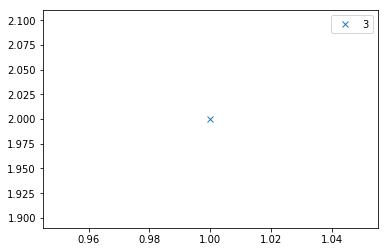

In [34]:
class plot(object):
    def plot(self):
        plt.figure()
        plt.plot(self.a,self.b,'x',label=self.c)
        plt.legend()

class postprocess(object):
    def post(self):
        self.c = self.a+self.b
        
class calc(plot,postprocess):
    def __init__(self):
        self.a = 1
        self.b = 2
        

inst = calc()
inst.post()
inst.plot()

In [438]:
x = np.arange(10)
y = x**2
a.set_func(x,y)
x2 = np.linspace(0,9,100)
y2 = a.get_val(x2)


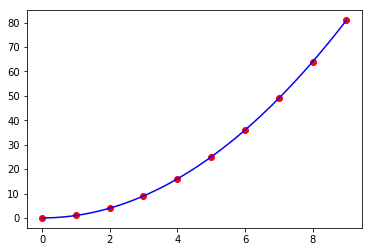

In [439]:
plt.figure()
plt.plot(x,y,'ro')
plt.plot(x2,y2,'b')

## Interpolation

In [562]:
x = np.linspace(0,.9,3)
y = np.linspace(1,2,2)
print(x,y)
for i in range(2):
    X,Y = np.meshgrid(x,y,indexing=['xy','ij'][i])
    print(X.shape,Y.shape)
    
    print('Y',Y[0,:])
    print(Y.flatten())
    print('X',X[:,0])
    print(X.flatten())
    print(X.flatten().reshape((2,3)))

[0.   0.45 0.9 ] [1. 2.]
(2, 3) (2, 3)
Y [1. 1. 1.]
[1. 1. 1. 2. 2. 2.]
X [0. 0.]
[0.   0.45 0.9  0.   0.45 0.9 ]
[[0.   0.45 0.9 ]
 [0.   0.45 0.9 ]]
(3, 2) (3, 2)
Y [1. 2.]
[1. 2. 1. 2. 1. 2.]
X [0.   0.45 0.9 ]
[0.   0.   0.45 0.45 0.9  0.9 ]
[[0.   0.   0.45]
 [0.45 0.9  0.9 ]]


[0. 0. 0. 0. 0.]
changed element 6.0 0.0
Z (5, 10)
False
False
Z2 (40, 10)
(10, 40)


/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:32: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


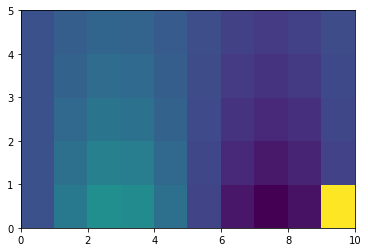

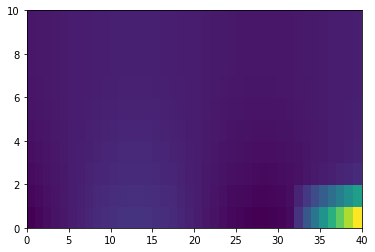

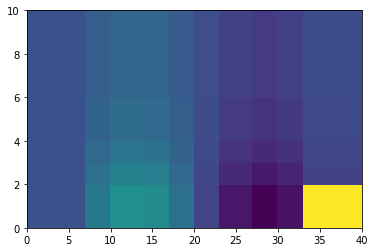

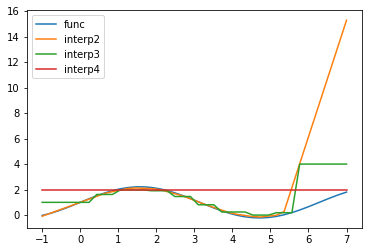

In [20]:
x = np.linspace(0,6,10)
y = np.linspace(0,6,5)
X,Y = np.meshgrid(x,y,indexing='xy')
print(X[:,0])

def func(x,y):
    return np.sin(x)*np.exp(-y/5)+1
Z = func(X,Y)
Z[0,-1]=4
print('changed element',X[0,-1],Y[0,-1])
# Z = Z.T
plt.figure()
plt.pcolor(Z)

print('Z',Z.shape)
# interp1 = sc.interpolate.NearestNDInterpolator((x,y),Z)
interp2 = sc.interpolate.RectBivariateSpline(x,y,Z.T,kx=1,ky=1,bbox=[-1,7,-1,7])
interp3 = sc.interpolate.RegularGridInterpolator((x,y),Z.T,method="nearest",bounds_error=False,fill_value=None)
interp4 = sc.interpolate.interp2d(x,y,Z,kind='linear',bounds_error=False,fill_value=2)
x2= np.linspace(-1,7,40)
y2= np.linspace(-1,10,10)
X2,Y2 = np.meshgrid(x2,y2,indexing='xy')


Z2 = interp2(x2,y2,grid=True)
Z2b= interp2(X2,Y2,grid=False)
def tempfunc(a,b):
    return interp3((a,b))
Z3 = interp3((Y2,X2))#,method='linear')
Z3b = tempfunc(X2,Y2)

print(np.all(Z2==Z2b))
print(np.all(Z3==Z3b))

print('Z2',Z2.shape)
plt.figure()
plt.pcolor(Z2b,)
print(Z3.shape)
plt.figure()
plt.pcolor(Z3b)

plt.figure()
plt.plot(x2,func(x2,y2[0]),label='func')
plt.plot(x2,interp2(x2,y2[0]),label='interp2')
plt.plot(x2,tempfunc(x2,y2[0]),label='interp3')
plt.plot(x2,interp4(x2,y2[0]),label='interp4')
plt.legend(loc=0)

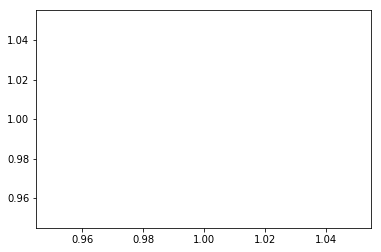

In [27]:
plt.figure()
plt.plot(1,1)


[ 0  1  4  9 16]
[ 0.5  2.5  6.5 12.5] [ 0.  2.  6. 12.]
[1.70710678 2.58113883 3.54950976 4.53553391]


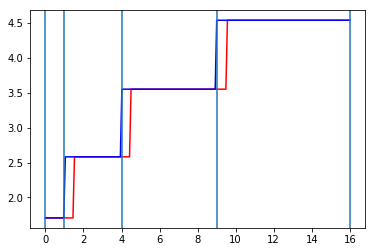

In [537]:
x=np.arange(5)
xb=x**2
print(x2)
xc = (xb[1:]+xb[:-1])/2
xsq =np.sqrt(xb)
xc2 = xsq[1:]*xsq[:-1]
print(xc,xc2)
f = 1+xc**.5
print(f)

interp1 = sc.interpolate.interp1d(xc,f,kind='nearest',bounds_error=False,fill_value="extrapolate")
interp2 = sc.interpolate.interp1d(xc2,f,kind='nearest',bounds_error=False,fill_value="extrapolate")

xval = np.linspace(0,np.max(xb),200)
plt.figure()
plt.plot(xval,interp1(xval),'r')
plt.plot(xval,interp2(xval),'b')
for i in range(5):
    plt.axvline(xb[i]) 

In [39]:
x = np.array([-2,-1,-1,1,1,1.5])
y = np.array([0,0,1,1,0,0])
t = np.linspace(0,1,x.size)
interpx = sc.interpolate.interp1d(t,x)
interpy = sc.interpolate.interp1d(t,y)
# tck,u = sc.interpolate.splprep([x,y],k=4)
# interp=sc.interpolate.splev(u,tck)


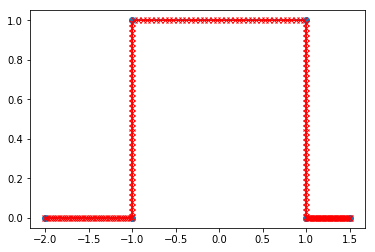

In [42]:
plt.figure()
plt.plot(x,y,'-o')

t2 =np.linspace(0,1,200)
plt.plot(interpx(t2),interpy(t2),'r-x')

In [44]:
np.searchsorted([1,2,3,4,5], 3.1)


3

# Flatten , reshape

In [219]:
x = np.arange(12).reshape(4,3)
xf = x.flatten()[:,np.newaxis]
xrsr=np.reshape(x,(12,1))
xrsc=np.reshape(x,(1,12))

print(x)
print(xf)
print(xrsr)
print(xrsc)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]
[[ 0  1  2  3  4  5  6  7  8  9 10 11]]


In [225]:
N=100
M=200
x = np.random.randn(N,M)
print(x.shape)
xf = x.flatten()[:,np.newaxis]
xc = np.reshape(x,(N*M,1))

(100, 200)


In [230]:
%%timeit -n 20
xf = x.flatten()[:,np.newaxis]

34.3 µs ± 20.8 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


In [228]:
%%timeit -n 20
xc = np.reshape(x,(N*M,1))

The slowest run took 5.07 times longer than the fastest. This could mean that an intermediate result is being cached.
9.84 µs ± 8.45 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


In [231]:
print(np.all(xf==xc))

True


In [49]:
x = np.arange(6)
x=x.reshape(2,3)
print(x,x[:,1])

[[0 1 2]
 [3 4 5]] [1 4]


# Sparse

In [196]:
import numpy as np
import scipy.sparse as sp

In [273]:
y=np.arange(4)+1
x = (sp.eye(4,k=1) + sp.eye(4,k=-1))
x = sp.diags(1/y,offsets = -1)
x = sp.csc_matrix(np.eye(4,k=1)/y)
x = sp.diags([y,1/y[1:]],offsets=[0,1])
print(x)
print(x.toarray())
print(y)
print(y[:,np.newaxis],y[:-1,np.newaxis],y[1:,np.newaxis])

  (0, 0)	1.0
  (1, 1)	2.0
  (2, 2)	3.0
  (3, 3)	4.0
  (0, 1)	0.5
  (1, 2)	0.3333333333333333
  (2, 3)	0.25
[[1.         0.5        0.         0.        ]
 [0.         2.         0.33333333 0.        ]
 [0.         0.         3.         0.25      ]
 [0.         0.         0.         4.        ]]
[1 2 3 4]
[[1]
 [2]
 [3]
 [4]] [[1]
 [2]
 [3]] [[2]
 [3]
 [4]]


In [200]:

yc = y[:,np.newaxis]
# yc = sp.(yc)
z = x.multiply(yc)
print(z)
x=x.tocsr()
print(type(x),type(yc),type(z+z))
print(y*x)

  (0, 1)	0.5
  (1, 2)	0.6666666666666666
  (2, 3)	0.75
<class 'scipy.sparse.csr.csr_matrix'> <class 'numpy.ndarray'> <class 'scipy.sparse.csr.csr_matrix'>
[0.         0.5        0.66666667 0.75      ]


In [185]:
N = int(1e4)
x= np.random.randn(N)
M = sp.diags(x,offsets=0,format='csr')
xv = x[:,np.newaxis]
xs = sp.diags(x,offsets=0,format='csr')
print(x.shape,xv.shape)

(10000,) (10000, 1)


In [187]:
%%timeit -n 10
global A
A = M.multiply(xv)

385 µs ± 145 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [193]:
%%timeit -n 10
global B
B = xs*M

466 µs ± 163 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [169]:
print(np.all(A.toarray()==B))

True


In [147]:
np.array(np.arange(4))
sp.eye(4).toarray()
(sp.eye(4)/4).toarray()
sp.diags([1/4,1/2],[0,1],shape=(4,4)).toarray()

array([[0.25, 0.5 , 0.  , 0.  ],
       [0.  , 0.25, 0.5 , 0.  ],
       [0.  , 0.  , 0.25, 0.5 ],
       [0.  , 0.  , 0.  , 0.25]])

In [68]:
x = np.arange(16).reshape(4,4)
y = np.arange(4)
print(x,x[0])
print(x*y)  # column with element
print(y*x)
print(x*(y[:,np.newaxis]))  # row with element

sx = sp.csc_matrix(x)
sy = sp.diags(y,0)
print((sx*sy).toarray())  # Column with element
print((sy*sx).toarray())  # Row with element

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]] [0 1 2 3]
[[ 0  1  4  9]
 [ 0  5 12 21]
 [ 0  9 20 33]
 [ 0 13 28 45]]
[[ 0  1  4  9]
 [ 0  5 12 21]
 [ 0  9 20 33]
 [ 0 13 28 45]]
[[ 0  0  0  0]
 [ 4  5  6  7]
 [16 18 20 22]
 [36 39 42 45]]
[[ 0.  1.  4.  9.]
 [ 0.  5. 12. 21.]
 [ 0.  9. 20. 33.]
 [ 0. 13. 28. 45.]]
[[ 0.  0.  0.  0.]
 [ 4.  5.  6.  7.]
 [16. 18. 20. 22.]
 [36. 39. 42. 45.]]


In [80]:
Nc=5
hx=.25
print(np.eye(Nc,k=0) + np.eye(Nc,k=1))
print(sp.diags([0.25/hx,0.25/hx] ,[0,1],shape=(Nc,Nc)).toarray())

[[1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]
[[1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]
